                                             message     label
0  موقع Novo Resumes موقع عجيب تسوي منه سيرتك الذ...  non_spam
1  استخدامه سهل كل اللي عليك انك تدخل البيانات ال...  non_spam
2                               مجاني للقالب الاساسي  non_spam
3                        وتقدر تشتري قوالب بسعر رخيص  non_spam
4                           بس المجاني يكفي صراحة 👌🏼  non_spam


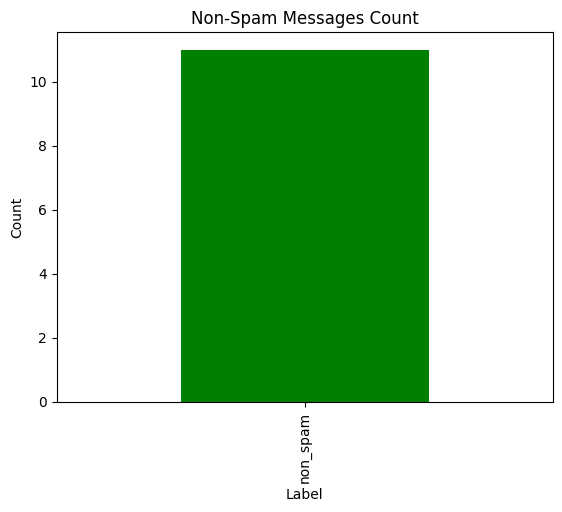

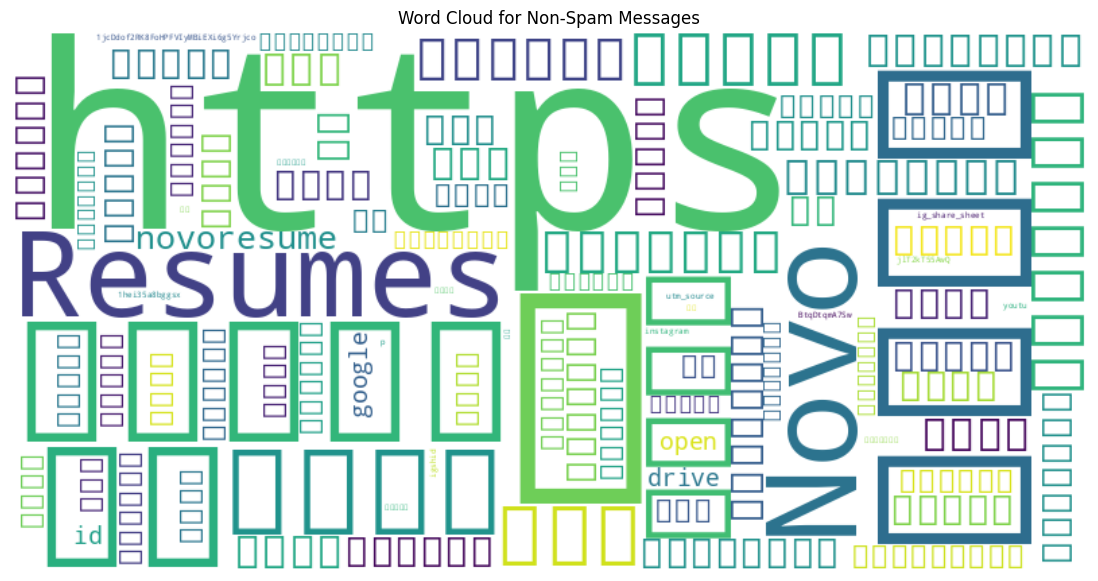

In [ ]:
# Library import
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ------------------------------
# 1. NON-SPAM file links
# ------------------------------
non_spam_urls = [
"https://raw.githubusercontent.com/HosamMukhairez/Arabic-Text-Spam-Detection/refs/heads/master/Arabic%20Dataset/non%20spam/11.txt",
"https://raw.githubusercontent.com/HosamMukhairez/Arabic-Text-Spam-Detection/refs/heads/master/Arabic%20Dataset/non%20spam/81.txt",
"https://raw.githubusercontent.com/HosamMukhairez/Arabic-Text-Spam-Detection/refs/heads/master/Arabic%20Dataset/non%20spam/85.txt",
"https://raw.githubusercontent.com/HosamMukhairez/Arabic-Text-Spam-Detection/refs/heads/master/Arabic%20Dataset/non%20spam/86.txt",
"https://raw.githubusercontent.com/HosamMukhairez/Arabic-Text-Spam-Detection/refs/heads/master/Arabic%20Dataset/non%20spam/87.txt",
# Add the rest of the links here in the same format...
]

# ------------------------------
# 2. Reading files in DataFrame
# ------------------------------
dfs_non_spam = []
for url in non_spam_urls:
    try:
        temp_df = pd.read_csv(url, header=None, names=['message'], engine='python', encoding='utf-8')
        temp_df['label'] = 'non_spam'
        dfs_non_spam.append(temp_df)
    except Exception as e:
        print(f"Error reading {url}: {e}")

# Merge all files into one DataFrame
df_non_spam = pd.concat(dfs_non_spam, ignore_index=True)

# Show the first 5 rows to confirm
print(df_non_spam.head())

# ------------------------------
# 3. Dataset Visualization
# ------------------------------

# 3.1 توزيع الرسائل حسب النوع (في حال دمج مع spam)
# إذا عندك spam DataFrame اسمه df_spam يمكنك دمجه:
# df = pd.concat([df_spam, df_non_spam], ignore_index=True)

df_non_spam['label'].value_counts().plot(kind='bar', color=['green'])
plt.title("Non-Spam Messages Count")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# 3.2 Word Cloud لعرض الكلمات الأكثر ظهوراً في الرسائل
all_text = ' '.join(df_non_spam['message'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Non-Spam Messages")
plt.show()

